<a href="https://colab.research.google.com/github/gimelato/imersao_dados-4/blob/main/imersaodados_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
caminho = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(caminho)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
dados["Valor"][0]

'R$ 7.000.000'

In [ ]:
dados["Valor"][0].split()

#o split usa por default os espaços para separar as strings

['R$', '7.000.000']

In [ ]:
dados.sample(15)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1505,Rua Barra Mansa,Jardim Franca,São Paulo,121,2,2,2,R$ 555.000
984,Rua Pau Brasil,Boaçava,São Paulo,553,3,7,4,R$ 6.750.000
8428,Rua Natal Pigassi,Jardim Celeste,São Paulo,150,4,3,2,R$ 570.000
6810,Rua Joaquim Cândido de Azevedo Marques,Vila Morumbi,São Paulo,490,4,8,7,R$ 9.000\n /Mês
3296,Rua São Bernardo,Cidade Mãe do Céu,São Paulo,159,3,2,2,R$ 1.200.000
3777,"Alameda dos Indígenas, 364",Planalto Paulista,São Paulo,314,3,4,2,R$ 1.450.000
418,NaN,Vila Nova Conceição,São Paulo,275,4,3,2,R$ 2.995.000
82,"Rua Cordisburgo, 251",Jardim Leonor,São Paulo,850,4,8,6,R$ 6.500.000
44,"Avenida Presidente Tancredo Neves, 668",Vila Nancy,São Paulo,132,2,1,1,R$ 390.000
4631,Rua Antônio de Gouveia Giudice,Alto de Pinheiros,São Paulo,361,4,4,4,R$ 3.500.000


In [ ]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
# a função unique indica quais são os valores que aparecem
dados['Valor'].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [ ]:
dados['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [ ]:
len(dados['Valor'].str.split(expand = True)[1].unique())

1038

In [3]:
dados[['Moeda','Valor_anuncio','Tipo_anuncio']] = dados['Valor'].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
dados[dados["Tipo_anuncio"].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [ ]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [4]:
#removendo os imoveis de aluguel, selecionando apenas os de venda
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [ ]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [5]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace('.','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


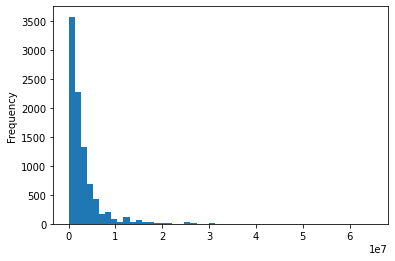

In [7]:
dados_vendas["Valor_anuncio_float"].plot.hist(bins=50)

In [8]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [9]:
#tirando a notação científica
pd.set_option("display.float_format", lambda x: '%.2f' % x)
dados_vendas.describe(include = "all")

#colocar o parâmetro 'include = 'all'' traz também informações estatísticas das variáveis qualitativas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

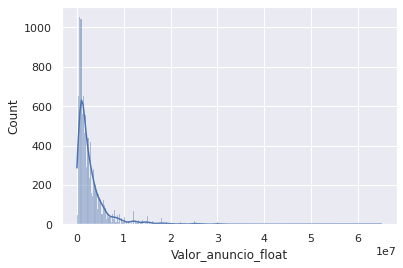

In [11]:
sns.histplot(data= dados_vendas, x= 'Valor_anuncio_float', kde = True);

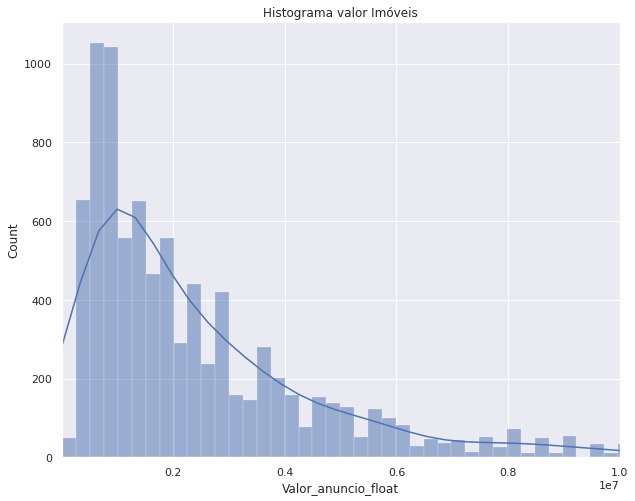

In [12]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data= dados_vendas, x= 'Valor_anuncio_float', kde = True);
ax.set_title("Histograma valor Imóveis")
plt.xlim((1000, 10000000))
plt.show()

###Desafios

1.   Criar uma escala de valores em milhões
2.   Deixar o histograma dos preços com indicação de milhares e milhões e mexer nas configurações gerais do gráfico para deixar ele bem apresentável
3.   Preço do metro quadrado por bairro. Depois fazer um gráfico disso (pontos?)(ver tipos de gráficos na documentação do seaborn)
4.   Explorar as bibliotecas de visualizações e colocar as suas conclusão
5.   Pesquisar uma visualização para analisar os quartis, mediana e outliers




In [13]:
#Desafio 1- Criar uma escala de valores em milhões

dados_vendas["Valor_em_milhoes"] = dados_vendas["Valor_anuncio_float"]/1000000

dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_em_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54


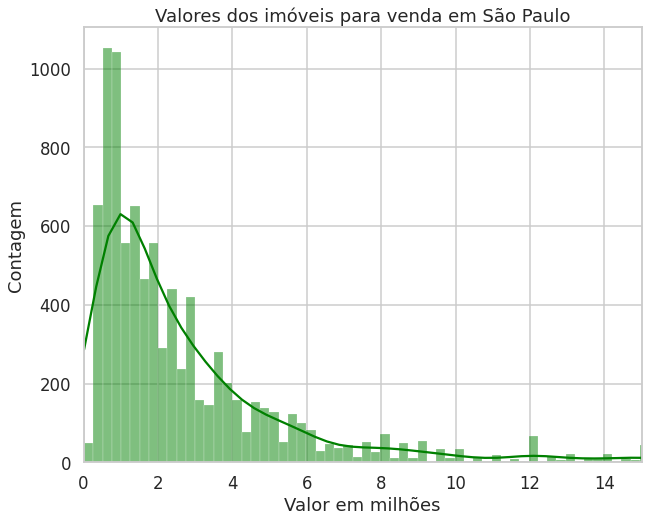

In [14]:
#Desafio 2 - Deixar o histograma dos preços com indicação de milhares e milhões e mexer nas configurações gerais do gráfico para deixar ele bem apresentável

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_context("talk")
ax = sns.histplot(data= dados_vendas, x= 'Valor_em_milhoes', kde = True, color="green");
ax.set_title("Valores dos imóveis para venda em São Paulo")
plt.xlabel('Valor em milhões')
plt.ylabel('Contagem')
plt.xlim((0, 15))
plt.show()

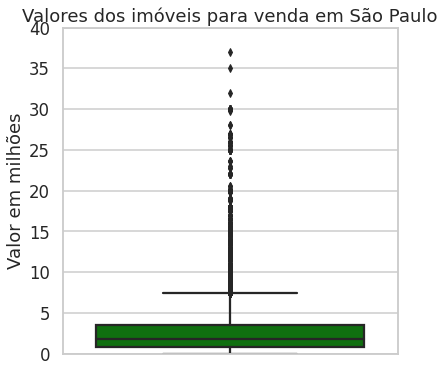

In [61]:
#Desafio 5 - Pesquisar uma visualização para analisar os quartis, mediana e outliers

plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
sns.set_context("talk")
ax = sns.boxplot(data= dados_vendas, y= 'Valor_em_milhoes', color="green");
ax.set_title("Valores dos imóveis para venda em São Paulo")
plt.ylabel('Valor em milhões')
plt.ylim((0, 40))
plt.show()

#Com o boxplot dá para ver que acima de 10 milhões são todos valores outliers (e eu ainda limitei, pois tem mais outliers ainda, seria bom olhar inclusive)

In [64]:
dados_vendas.query("Valor_em_milhoes > 20")
#Ê São Paulo, só os bairro nobre, só os andador de BMW e Ferrari
#Não gosto de classificar como outlier, afinal é uma categoria totalmente a parte.
#Aqui é um caso que a estatítisca não leva a consideração o fator humano da distribuição desigual de renda.

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio_float,Valor_em_milhoes,preço_metro
102,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,R$ 37.000.000,37000000.00,37.00,48941.80
108,NaN,Jardim Paulista,São Paulo,1060,5,5,4,R$ 30.000.000,30000000.00,30.00,28301.89
195,Rua Itália,Jardim Europa,São Paulo,713,5,7,6,R$ 26.600.000,26600000.00,26.60,37307.15
260,Rua dos Franceses,Morro dos Ingleses,São Paulo,1039,6,7,20,R$ 22.000.000,22000000.00,22.00,21174.21
400,NaN,Jardim Europa,São Paulo,1510,5,5,20,R$ 65.000.000,65000000.00,65.00,43046.36
...,...,...,...,...,...,...,...,...,...,...,...
8364,NaN,Jardim Petrópolis,São Paulo,912,4,6,10,R$ 32.000.000,32000000.00,32.00,35087.72
8381,NaN,Jardim América,São Paulo,936,4,6,5,R$ 26.000.000,26000000.00,26.00,27777.78
8710,Rua Groenlândia,Jardim América,São Paulo,814,4,8,4,R$ 25.000.000,25000000.00,25.00,30712.53
8894,Rua Maestro Elias Lobo,Jardim Paulista,São Paulo,1060,5,5,5,R$ 30.000.000,30000000.00,30.00,28301.89


In [16]:
#Desafio 3 - Preço do metro quadrado por bairro. Depois fazer um gráfico disso

dados_vendas["preço_metro"] = dados_vendas["Valor_anuncio_float"]/dados_vendas["Metragem"]
#dados_vendas.drop(['Valor_anuncio', "Moeda", "Tipo_anuncio"], axis=1, inplace=True)
dados_vendas.sample(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio_float,Valor_em_milhoes,preço_metro
3086,"Rua Moisés Anaute, 0",Jardim Odete,São Paulo,220,3,5,4,R$ 1.030.000,1030000.00,1.03,4681.82
3001,Rua Leiria,Jardim Luzitânia,São Paulo,330,4,5,4,R$ 7.900.000,7900000.00,7.90,23939.39
8831,NaN,Saúde,São Paulo,215,3,1,4,R$ 870.000,870000.00,0.87,4046.51
7805,NaN,Mooca,São Paulo,225,4,2,1,R$ 645.000,645000.00,0.65,2866.67
47,"Rua Artur Montenegro, 9",Jardim Iva,São Paulo,250,2,2,2,R$ 370.000,370000.00,0.37,1480.00
8985,"Rua Rodrigues Guião, 146",Pinheiros,São Paulo,135,3,3,1,R$ 2.000.000,2000000.00,2.00,14814.81
1165,Rua Euclídes de Andrade,Pompeia,São Paulo,80,2,2,2,R$ 990.000,990000.00,0.99,12375.00
6702,Praça Graciliano Ramos,Vila Mariana,São Paulo,241,4,2,3,R$ 1.450.000,1450000.00,1.45,6016.60
6927,Avenida Lins de Vasconcelos,Cambuci,São Paulo,125,3,5,2,R$ 900.000,900000.00,0.90,7200.00
5564,NaN,Jardim Paulista,São Paulo,554,3,3,7,R$ 5.900.000,5900000.00,5.90,10649.82


In [17]:
preco_metro_bairro = dados_vendas.groupby("Bairro")["preço_metro"].mean()

In [27]:
preco_metro_bairro.sort_values(ascending=False)
#A Vila Guaca está com um valor exorbitantemente mais alto que o resto

Bairro
Vila Guaca                     80000.00
Jardim América                 24088.57
Jardim Ampliação               20051.04
Jardim Europa                  19962.69
Vila Nova Conceição            17614.03
                                 ...   
Jardim Brasília (Zona Leste)    1055.01
Jardim Itapemirim               1054.50
Vila Aurea                       906.59
Jardim Vera Cruz(Zona Leste)     544.76
Sítio Represa                     78.38
Name: preço_metro, Length: 697, dtype: float64

In [28]:
dados_vendas.query("Bairro == 'Vila Guaca'")

#Aparentemente foi um erro de entrada na base. 10 metros não tem nem sentido, ainda mais com 3 quartos e 2 banheiros

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio_float,Valor_em_milhoes,preço_metro
9603,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,R$ 800.000,800000.00,0.80,80000.00


In [29]:
# Então eu vou tirar a Vila Guaca
#dados_vendas.drop(9603, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
#Conferindo se saiu
dados_vendas.query("Bairro == 'Vila Guaca'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio_float,Valor_em_milhoes,preço_metro


In [32]:
preco_metro_bairro = dados_vendas.groupby("Bairro")["preço_metro"].mean()

In [35]:
dados_vendas.query("Bairro == 'Jardim América'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio_float,Valor_em_milhoes,preço_metro
67,Rua Bolívia,Jardim América,São Paulo,663,4,7,6,R$ 14.500.000,14500000.00,14.50,21870.29
198,"Rua Bolívia, 200",Jardim América,São Paulo,1060,4,5,9,R$ 11.489.000,11489000.00,11.49,10838.68
250,NaN,Jardim América,São Paulo,617,4,4,8,R$ 9.500.000,9500000.00,9.50,15397.08
375,Rua Desembargador Vicente Penteado,Jardim América,São Paulo,410,4,6,3,R$ 5.200.000,5200000.00,5.20,12682.93
662,Rua Panamá,Jardim América,São Paulo,950,4,4,6,R$ 26.000.000,26000000.00,26.00,27368.42
...,...,...,...,...,...,...,...,...,...,...,...
8455,NaN,Jardim América,São Paulo,653,4,7,6,R$ 12.500.000,12500000.00,12.50,19142.42
8654,"Rua Guadelupe, 222",Jardim América,São Paulo,753,4,5,6,R$ 14.000.000,14000000.00,14.00,18592.30
8710,Rua Groenlândia,Jardim América,São Paulo,814,4,8,4,R$ 25.000.000,25000000.00,25.00,30712.53
9428,Rua Atlântica,Jardim América,São Paulo,600,4,5,7,R$ 27.000.000,27000000.00,27.00,45000.00


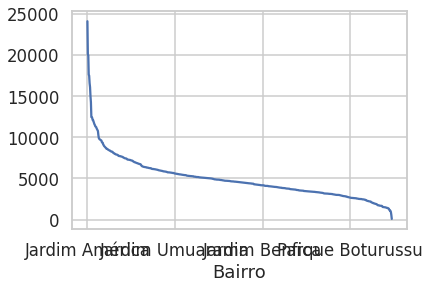

In [33]:
preco_metro_bairro.sort_values(ascending=False).plot()
#ok, é realmente muito dificil encontrar um gráfico bom para isso.
#Coloquei plot aqui para ter noção da distribuição do preço por metro e ver que gráfico ele faria

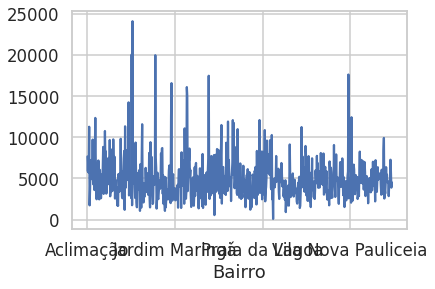

In [34]:
preco_metro_bairro.plot()
#Mesma coisa aqui

Pedi por socorro no google a achei que daria para fazer [esse tipo](https://seaborn.pydata.org/examples/pairgrid_dotplot.html) de gráfico

In [52]:
#Agora é o desafio de ajustar esse gráfico aos meus dados
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(preco_metro_bairro.sort_values(),
                 x_vars=preco_metro_bairro.values, y_vars=preco_metro_bairro.index,
                 height=30, aspect=.20)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Preço do metro", ylabel="")

# Use semantically meaningful titles for the columns
#titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
         # "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

KeyError: ignored

In [49]:
preco_metro_bairro.values

array([ 7656.16946486,  5849.5690109 ,  7606.7280801 ,  5691.74013307,
       11269.97997143,  1726.61870504,  3600.        ,  6173.43421797,
        6146.30870623,  7233.548559  ,  5052.63157895,  4890.45762862,
        9712.54562174,  4457.89836257,  4252.11640212,  6303.92240976,
        3584.55882353,  7893.87009632, 12343.14920057,  7264.91908428,
        6376.38438438,  2466.66666667,  6743.32945393,  5904.60600065,
        3645.38498326,  7176.03363862,  5324.85714286,  2452.83018868,
        6049.78354978,  4166.66666667,  5520.        ,  2591.62303665,
        4575.16339869,  3457.68371073,  5054.55525031,  6139.31307122,
        8823.78808389,  3116.50510204,  3458.46357013,  6243.58974359,
       10754.61121479,  7303.06919446,  8271.77916567,  3153.58126722,
        3274.26072707,  5273.53725668,  6302.87739126,  6790.55361982,
        7483.29448289,  4999.46349053,  4266.66666667,  9664.9691358 ,
        2825.25252525,  5575.75757576,  3333.33333333,  3684.55861877,
      